In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import json
from scipy.optimize import curve_fit
from scipy import stats
from pprint import pprint
from sklearn.metrics import r2_score
#mpld3.enable_notebook()
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
conc1 = pd.read_csv('concurrency1.csv')
conc2 = pd.read_csv('Concurrency2.csv')
conc3 = pd.read_csv('stage_0_ttx.csv')

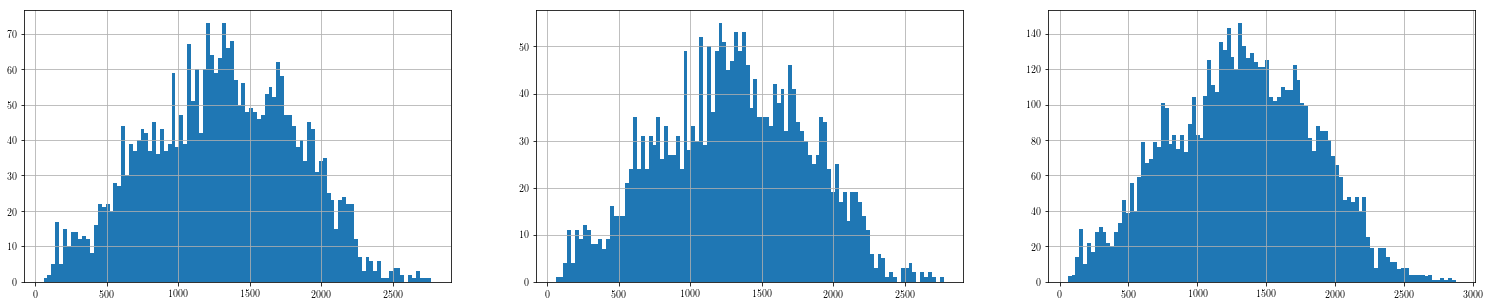

In [3]:
fix,axes = plt.subplots(nrows=1, ncols=3, figsize=(26,5))
conc1['Size'].hist(bins=100, ax=axes[0])
conc2['Size'].hist(bins=100, ax=axes[1])
conc3['ImageSize'].hist(bins=100, ax=axes[2])

In [4]:
print 'Mean',conc1['Size'].mean(), 'Sigma',conc1['Size'].std()
print '1 Sigma',[conc1['Size'].mean() -   conc1['Size'].std(),conc1['Size'].mean() +   conc1['Size'].std()]
print '2 Sigma',[conc1['Size'].mean() - 2*conc1['Size'].std(),conc1['Size'].mean() + 2*conc1['Size'].std()]

for i in range(50,2800,125):
    print 'Bin %d' % ((i-50)/125), [i,i+125]

Mean 1304.264514024788 Sigma 512.4814946658256
1 Sigma [791.7830193589624, 1816.7460086906135]
2 Sigma [279.3015246931368, 2329.2275033564392]
Bin 0 [50, 175]
Bin 1 [175, 300]
Bin 2 [300, 425]
Bin 3 [425, 550]
Bin 4 [550, 675]
Bin 5 [675, 800]
Bin 6 [800, 925]
Bin 7 [925, 1050]
Bin 8 [1050, 1175]
Bin 9 [1175, 1300]
Bin 10 [1300, 1425]
Bin 11 [1425, 1550]
Bin 12 [1550, 1675]
Bin 13 [1675, 1800]
Bin 14 [1800, 1925]
Bin 15 [1925, 2050]
Bin 16 [2050, 2175]
Bin 17 [2175, 2300]
Bin 18 [2300, 2425]
Bin 19 [2425, 2550]
Bin 20 [2550, 2675]
Bin 21 [2675, 2800]


In [5]:
Conc1Binned = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
for i in range(50,2800,125):
    Conc1Binned.loc[len(Conc1Binned)] = [[i, i + 125],conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['Size'].values,
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['Size'].values.mean(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['Size'].values.std(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['Size'].values.min(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['Size'].values.max(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['OutputTime'].values,
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['OutputTime'].values.mean(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['OutputTime'].values.std(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['OutputTime'].values.min(),
                                                      conc1[(i < conc1['Size']) & (conc1['Size']< (i + 125))]['OutputTime'].values.max()]
Conc2Binned = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
for i in range(50,2800,125):
    Conc2Binned.loc[len(Conc2Binned)] = [[i, i + 125],conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['Size'].values,
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['Size'].values.mean(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['Size'].values.std(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['Size'].values.min(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['Size'].values.max(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['OutputTime'].values,
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['OutputTime'].values.mean(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['OutputTime'].values.std(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['OutputTime'].values.min(),
                                                      conc2[(i < conc2['Size']) & (conc2['Size']< (i + 125))]['OutputTime'].values.max()]
Conc8Binned = pd.DataFrame(columns=['Bin','SizeArray','SizeMean','SizeStd','SizeMin','SizeMax','TimeArray','TimeMean','TimeStd','TimeMin','TimeMax'])
for i in range(50,2800,125):
    Conc8Binned.loc[len(Conc8Binned)] = [[i, i + 125],conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['ImageSize'].values,
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['ImageSize'].values.mean(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['ImageSize'].values.std(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['ImageSize'].values.min(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['ImageSize'].values.max(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['TTX'].values,
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['TTX'].values.mean(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['TTX'].values.std(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['TTX'].values.min(),
                                                      conc3[(i < conc3['ImageSize']) & (conc3['ImageSize']< (i + 125))]['TTX'].values.max()]

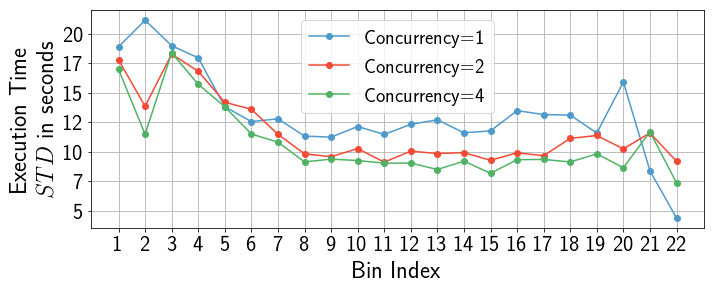

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(11,4),sharey=True,sharex=True)
_ = axis.plot(range(1,23),Conc1Binned['TimeStd'].values,marker='o',color=blues(150),label='Concurrency=1')
_ = axis.plot(range(1,23),Conc2Binned['TimeStd'].values,marker='o',color=reds(150),label='Concurrency=2')
_ = axis.plot(range(1,23),Conc8Binned['TimeStd'].values,marker='o',color=greens(150),label='Concurrency=4')
# _ = axis.set_title('Task execution Time versus image size and concurrency', fontsize=18)
_ = axis.set_ylabel('Execution Time\n$STD$ in seconds',fontsize=24)
_ = axis.set_xlabel('Bin Index',fontsize=24)
_ = axis.grid('on')
_ = axis.legend(fontsize=20)
_ = axis.set_xticks(range(1,23))
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=22)
_ = axis.set_yticklabels(axis.get_yticks().astype('int').tolist(),fontsize=22)
#fig.savefig('concerrency_std.pdf',dpi=800,bbox_inches='tight')
